<a href="https://colab.research.google.com/github/Mafaz5128/Web-Application---Predicting-Airline-Passenger-Satisfaction-Using-Machine-Learning-Model/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [21]:
train = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [22]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5.0,50.0,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5.0,0.0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2.0,0.0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4.0,0.0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4.0,0.0,20.0,satisfied


In [23]:
train = train.drop(columns=['Unnamed: 0','id'])
test= test.drop(columns=['Unnamed: 0','id'])

In [24]:
train.columns[train.isna().any()].tolist()

['Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [25]:
test.columns[train.isna().any()].tolist()

['Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [26]:
def detect_outliers(column):
    threshold = 3,
    z_value = (column- column.mean())/column.std()
    return (abs(z_value)> threshold).any()

In [27]:
bool_train_outliers = train[['Arrival Delay in Minutes']].apply(lambda x: detect_outliers(x.dropna()))
bool_test_outliers = test[['Arrival Delay in Minutes']].apply(lambda x: detect_outliers(x.dropna()))
print(bool_train_outliers)
print(bool_test_outliers)

Arrival Delay in Minutes    True
dtype: bool
Arrival Delay in Minutes    True
dtype: bool


In [28]:
#Imputation using median
train[['Arrival Delay in Minutes']] = train[['Arrival Delay in Minutes']].apply(lambda x: x.fillna(x.median()))
test[['Arrival Delay in Minutes']] = train[['Arrival Delay in Minutes']].apply(lambda x: x.fillna(x.median()))

In [29]:
# Scalling
num_col = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
ord_col =['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']
nominal_col =['Gender','Customer Type','Type of Travel','Class']


In [30]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['satisfaction'])
y_test = label_encoder.fit_transform(test['satisfaction'])

In [31]:
ordinal_encoder = OrdinalEncoder()
nominal_encoder = OneHotEncoder(sparse_output = False, drop = 'first')
numeric_encoder = StandardScaler()
preprocessor = ColumnTransformer(
    transformers =[
        ('numeric',numeric_encoder,num_col),
        ('ordinal',ordinal_encoder,ord_col),
        ('nominal',nominal_encoder,nominal_col)
    ]
)
pipeline = Pipeline(steps=[('preprocessor',preprocessor)])
X_train = pipeline.fit_transform(train)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_names_adjusted=[name.split('__',1)[-1] for name in feature_names]

X_train = pd.DataFrame(X_train,columns=feature_names_adjusted)
X_train.head()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.742843,-0.737102,0.264545,0.072710,3.0,4.0,3.0,0.0,5.0,3.0,...,3.0,3.0,4.0,5.0,5.0,1.0,0.0,1.0,0.0,1.0
1,-0.948960,-0.961639,-0.358333,-0.235981,3.0,2.0,3.0,2.0,1.0,3.0,...,5.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,-0.882803,-0.056505,-0.384286,-0.390326,2.0,2.0,2.0,1.0,5.0,5.0,...,3.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,-0.948960,-0.635312,-0.098800,-0.158808,2.0,5.0,5.0,4.0,2.0,2.0,...,5.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1.432691,-0.982596,-0.384286,-0.390326,3.0,3.0,3.0,2.0,4.0,5.0,...,4.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0


In [32]:
X_test = pipeline.fit_transform(test)
X_test = pd.DataFrame(X_test,columns=feature_names_adjusted )
X_test.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.809665,-1.034417,0.960063,0.072710,5.0,4.0,3.0,3.0,3.0,4.0,...,5.0,4.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0
1,-0.242951,1.672348,-0.400111,-0.235981,1.0,1.0,3.0,0.0,5.0,4.0,...,4.0,3.0,2.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
2,-1.295568,-1.002373,-0.400111,-0.390326,2.0,0.0,2.0,3.0,2.0,2.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
3,0.283357,2.187064,-0.400111,-0.158808,0.0,0.0,0.0,1.0,3.0,4.0,...,1.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0
4,0.612300,-0.010994,-0.400111,-0.390326,2.0,3.0,4.0,2.0,4.0,1.0,...,2.0,1.0,3.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0


In [33]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
model_report = classification_report(y_test,xgb_classifier.predict(X_test), target_names=np.unique(y_test).astype(str))
print("Classification Report for XGBoost:\n",model_report)

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5074
           1       0.96      0.90      0.93      3942
           2       0.00      0.00      0.00         1

    accuracy                           0.94      9017
   macro avg       0.63      0.62      0.63      9017
weighted avg       0.94      0.94      0.94      9017



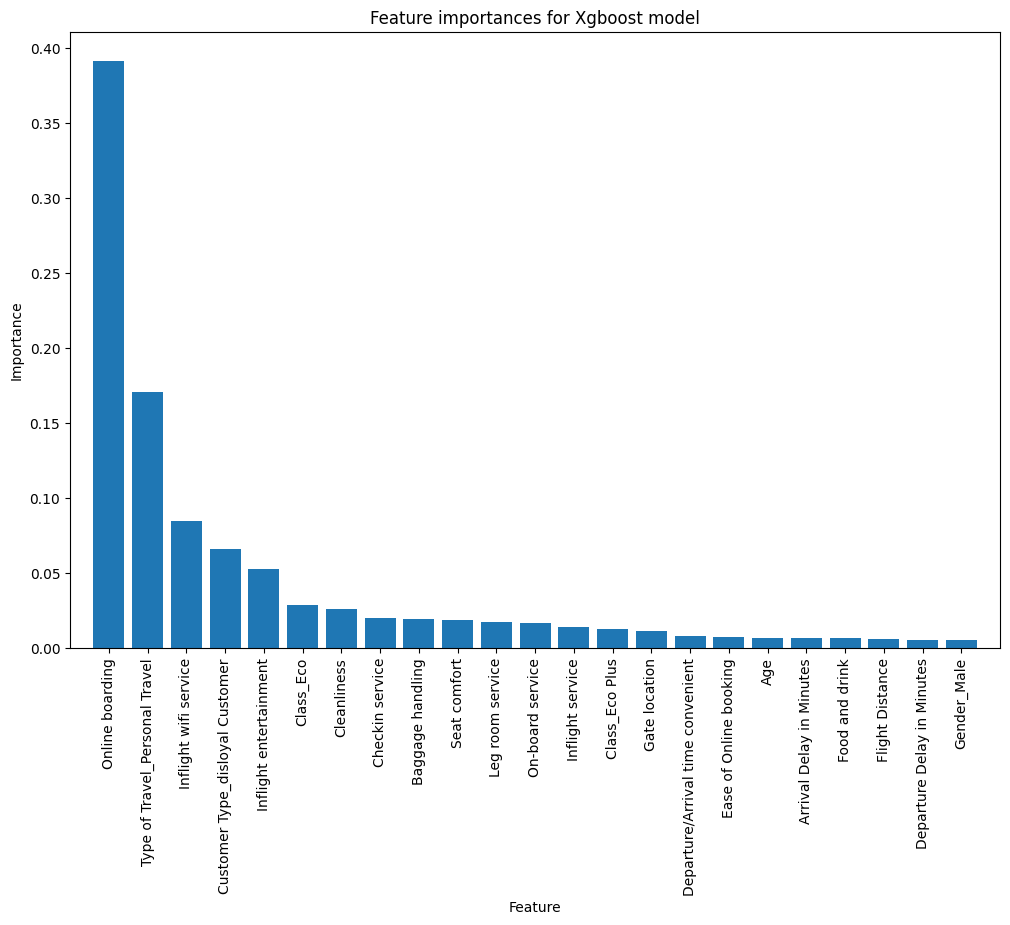

In [35]:
importances= xgb_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X_train.columns
df_importances = pd.DataFrame({
    'Feature':feature_names[indices],
    'Importance': importances[indices]
})

plt.figure(figsize=(12,8))
plt.title('Feature importances for Xgboost model')
plt.bar(range(X_train.shape[1]),importances[indices],align = 'center')
plt.xticks(range(X_train.shape[1]),feature_names[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [36]:
top_5_indices = indices[:5]
X_train_top5=X_train.iloc[:,top_5_indices]
X_test_top5=X_test.iloc[:,top_5_indices]

In [37]:
top_xgb_clf = xgb.XGBClassifier(random_state=42)
top_xgb_clf.fit(X_train_top5, y_train)

y_train_pred_top_xgb = top_xgb_clf.predict(X_train_top5)
y_test_pred_top_xgb = top_xgb_clf.predict(X_test_top5)
print("Classification Report for  XGBoost with top predictors:\n",classification_report(y_test, y_test_pred_top_xgb))

Classification Report for  XGBoost with top predictors:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      5074
           1       0.93      0.89      0.91      3942
           2       0.00      0.00      0.00         1

    accuracy                           0.92      9017
   macro avg       0.62      0.61      0.62      9017
weighted avg       0.92      0.92      0.92      9017



In [38]:
import pickle
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)